# Analisis de Clase de complejidad del problema

### Esta en NP:

Este problema pertenece a la clase de complejidades NP ya que existe un verificador que puede checkear la correctitud de una solucion al mismo en tiempo polinomial, como se puede ver a continuacion.

In [ ]:
def verificar(A, B, k, sol):
    if len(sol) > k:
        return False
    
    for subconjunto in B:
        hit = False
        for elem in subconjunto:
            if elem in sol:
                hit = True
                break
        if not hit:
            return False
    
    return True

La complejidad temporal de este verificador es **O(m\*n)** ya que se iteran todos los *m* subconjuntos y por cada uno se ven sus elementos que en el peor caso serian *n*. Esta complejidad es polinomial.

### Esta en NP-Completo:

Para demostrar que este problema de Hitting set se encuentra en la clase NP-completo se reducira polinomialmente un problema conocido que este en esa clase a HS, en este caso se hara con el problema Dominating set.

* Primeramente para poder hacer que HS resuelva DS hay que adaptar la entrada. Dada una instancia de DS se debera crear un conjunto A con todos los nodos del grafo G (que es parte de dicha instancia), una vez creado ese conjunto habra que crear un nuevo conjunto de conjuntos B, en el que se pondra un subconjunto B_i por cada nodo en G, y ese subconjunto incluira el mismo nodo y todos sus adyacentes. Una vez hechas estas 2 cosas, se le da A, B y el k sin modificar (de la instancia de DS) a una caja negra resolvedora de Hitting set. *Estas transformaciones se hacen en tiempo polinomial ya que para eso basta con usar un recorrido de grafos como bfs.*
* La caja negra se ejecutara 1 sola vez, y dara el resultado de Hitting set.
* Una vez obtenido el resultado de Hitting set, tendremos un conjunto de nodos que a su vez es exactamente la solucion de Dominating set, esto es porque hitting set se asegurara de seleccionar al menos 1 elemento de cada subconjunto en B lo que es lo mismo que decir que dado un nodo *u* se asegura de seleccionarlo o almenos seleccionar a alguno de sus adyacentes (y eso es lo que busca Dominating set).

**Entonces podemos decir que DS <= HS (reduccion polinomica) y por lo tanto HS pertenece a NP-Completo**

Aqui se puede ver un ejemplo que demuestra lo dicho:

![ejemplo](./utils/ejemplo.png)

# Analisis de tiempos del algoritmo

In [5]:

from algoritmo_aproximado import hitting_set_greedy
from algoritmo_backtracking import obtener_hitting_set
from utils.utils import obtener_conjunto_y_subconjuntos
from time import time
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

def correr_benchmark_optimo(A, B):
    
    empieza = time()
    obtener_hitting_set(A, B)
    termina = time()
    
    return termina - empieza

def correr_benchmark_aproximado(A, B):
    
    empieza = time()
    hitting_set_greedy(B)
    termina = time()
    
    return termina - empieza


### Tiempo del algoritmo optimo en funcion de la cantidad de peticiones *n*

* En estas pruebas se vera

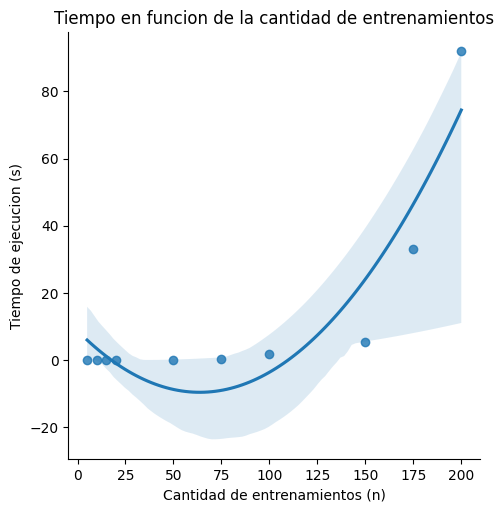

In [4]:
def plottear_tiempos_de_optimo_en_funcion_de_cantidad_de_peticiones():

    archivos = ["./archivos_prueba/5.txt", "./archivos_prueba/10_varios.txt", "./archivos_prueba/15.txt", "./archivos_prueba/20.txt", "./archivos_prueba/50.txt", "./archivos_prueba/75.txt", "./archivos_prueba/100.txt", "./archivos_prueba/150_not_for_testing.txt", "./archivos_prueba/175_not_for_testing.txt", "./archivos_prueba/200.txt"]
    cantidades = [5, 10, 15, 20, 50, 75, 100, 150, 175, 200]
    tiempos = []
    for archivo in archivos:
        A, B = obtener_conjunto_y_subconjuntos(archivo)
        tiempos.append(correr_benchmark_optimo(A, B))

    df = pd.DataFrame(data={"cantidades": cantidades, "tiempos": tiempos})
    sns.lmplot(x='cantidades', y='tiempos', data=df, order=2)
    plt.title("Tiempo en funcion de la cantidad de entrenamientos")
    plt.xlabel("Cantidad de entrenamientos (n)")
    plt.ylabel("Tiempo de ejecucion (s)")
    
plottear_tiempos_de_optimo_en_funcion_de_cantidad_de_peticiones()

Se puede observar

### Tiempo del algoritmo aproximado en funcion de la cantidad de peticiones *n*

* En estas pruebas se vera 

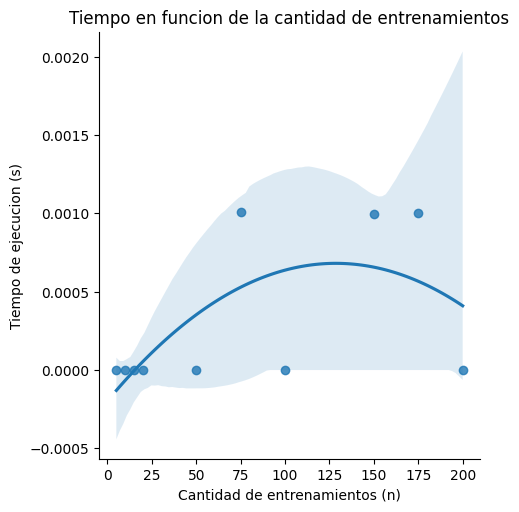

In [13]:
def plottear_tiempos_de_aproximado_en_funcion_de_cantidad_de_peticiones():

    archivos = ["./archivos_prueba/5.txt", "./archivos_prueba/10_varios.txt", "./archivos_prueba/15.txt", "./archivos_prueba/20.txt", "./archivos_prueba/50.txt", "./archivos_prueba/75.txt", "./archivos_prueba/100.txt", "./archivos_prueba/150_not_for_testing.txt", "./archivos_prueba/175_not_for_testing.txt", "./archivos_prueba/200.txt"]
    cantidades = [5, 10, 15, 20, 50, 75, 100, 150, 175, 200]
    tiempos = []
    for archivo in archivos:
        A, B = obtener_conjunto_y_subconjuntos(archivo)
        tiempos.append(correr_benchmark_aproximado(A, B))

    df = pd.DataFrame(data={"cantidades": cantidades, "tiempos": tiempos})
    sns.lmplot(x='cantidades', y='tiempos', data=df, order=2)
    plt.title("Tiempo en funcion de la cantidad de entrenamientos")
    plt.xlabel("Cantidad de entrenamientos (n)")
    plt.ylabel("Tiempo de ejecucion (s)")
    
plottear_tiempos_de_aproximado_en_funcion_de_cantidad_de_peticiones()

En este grafico se puede observar 

### Ejemplos de ejecucion